In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv(r'C:\Users\Tombra\deployment\data.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:

# Check for null values in each column
null_columns = df.columns[df.isnull().any()]

# Print the columns with null values
print("Columns with null values:")
for column in null_columns:
    print(column)


Columns with null values:
Gender
Married
Dependents
Self_Employed
LoanAmount
Loan_Amount_Term
Credit_History


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Fill categorical null values with mode
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)

# Fill numerical null values with mean
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(), inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(), inplace=True)


In [76]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include=['int', 'float']).columns

# Fill NaN values with mode for categorical features
for feature in categorical_features:
    mode_value = df[feature].mode()[0]
    df[feature].fillna(mode_value, inplace=True)

# Fill NaN values with median for numerical features
for feature in numerical_features:
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)


In [77]:
df.isna().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:
# Count occurrences of value 1 in the "credit_history" column as 1 represents having credit history
credit_history_yes = df["Credit_History"][df["Credit_History"] == 1].value_counts()

# Print the count of value 1

print(credit_history_yes)



1.0    475
Name: Credit_History, dtype: int64


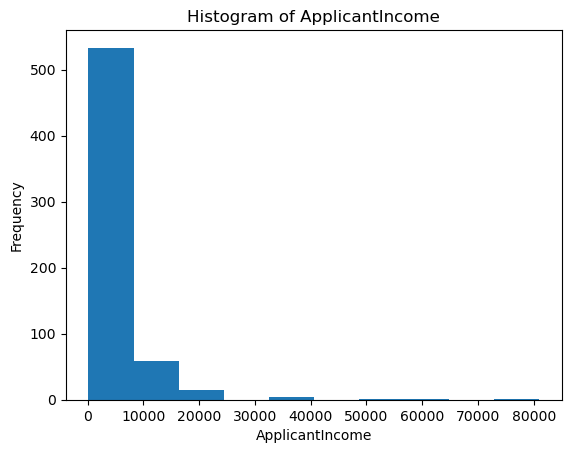

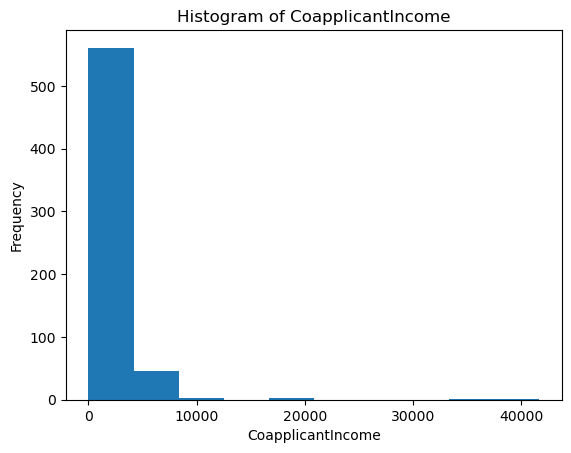

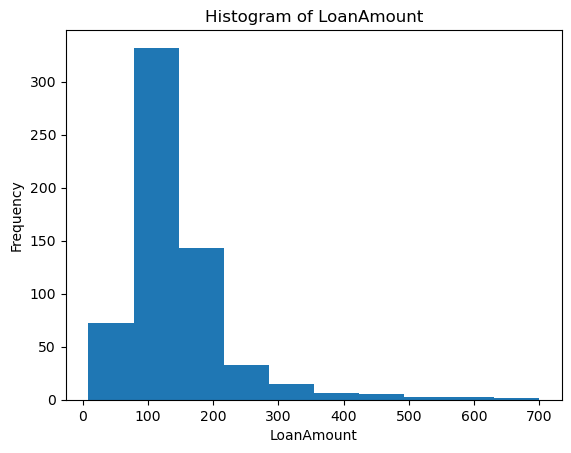

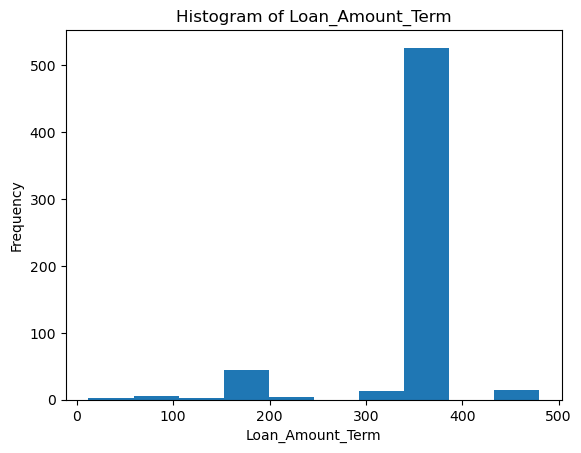

In [11]:


# Select the columns for which you want to plot the histogram
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Plot histograms for each column
for column in columns:
    plt.hist(df[column], bins=10)  # Adjust the number of bins as needed
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


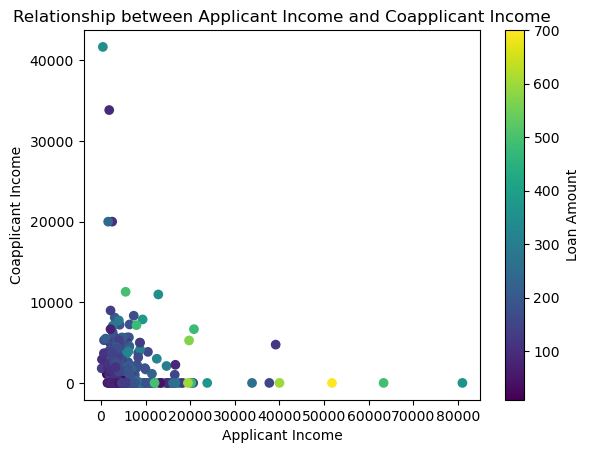

In [12]:


# Extract the columns for plotting
applicant_income = df['ApplicantIncome']
coapplicant_income = df['CoapplicantIncome']
loan_amount = df['LoanAmount']

# Plot the scatter plot
plt.scatter(applicant_income, coapplicant_income, c=loan_amount, cmap='viridis')

# Set labels and title
plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.title('Relationship between Applicant Income and Coapplicant Income')

# Add a colorbar to represent loan amount
cbar = plt.colorbar()
cbar.set_label('Loan Amount')

# Display the graph
plt.show()


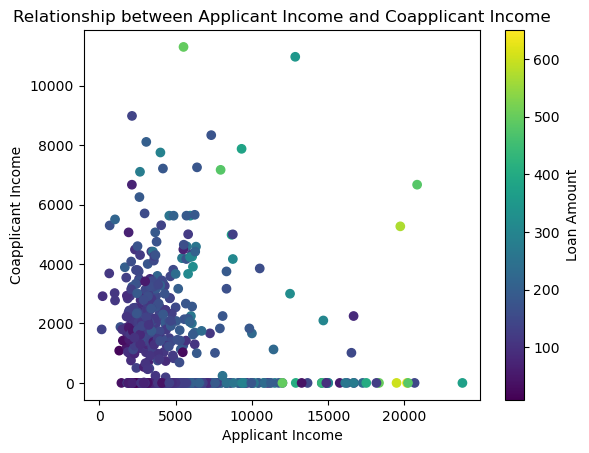

In [13]:
# Filter the data
filtered_df = df[(df['CoapplicantIncome'] <= 15000) & (df['ApplicantIncome'] <= 30000)]

# Extract the columns for plotting from the filtered data
applicant_income = filtered_df['ApplicantIncome']
coapplicant_income = filtered_df['CoapplicantIncome']
loan_amount = filtered_df['LoanAmount']

# Plot the scatter plot
plt.scatter(applicant_income, coapplicant_income, c=loan_amount, cmap='viridis')

# Set labels and title
plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.title('Relationship between Applicant Income and Coapplicant Income')

# Add a colorbar to represent loan amount
cbar = plt.colorbar()
cbar.set_label('Loan Amount')

# Display the graph
plt.show()


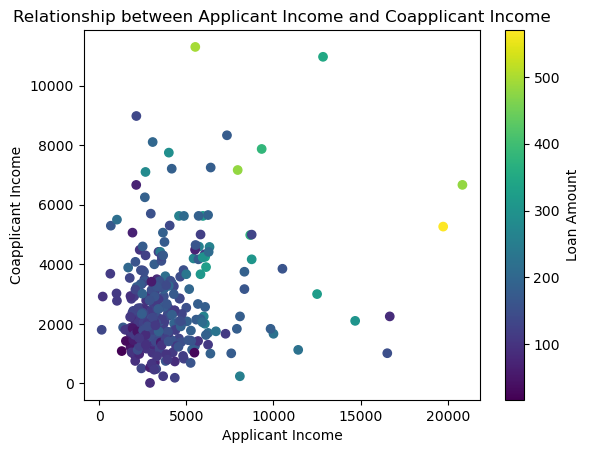

In [14]:
# Filter the data
filtered_df = df[(df['CoapplicantIncome'] <= 15000) & (df['ApplicantIncome'] <= 30000) & (df['CoapplicantIncome'] > 0) & (df['ApplicantIncome'] > 0)]

# Extract the columns for plotting from the filtered data
applicant_income = filtered_df['ApplicantIncome']
coapplicant_income = filtered_df['CoapplicantIncome']
loan_amount = filtered_df['LoanAmount']

# Plot the scatter plot
plt.scatter(applicant_income, coapplicant_income, c=loan_amount, cmap='viridis')

# Set labels and title
plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.title('Relationship between Applicant Income and Coapplicant Income')

# Add a colorbar to represent loan amount
cbar = plt.colorbar()
cbar.set_label('Loan Amount')

# Display the graph
plt.show()


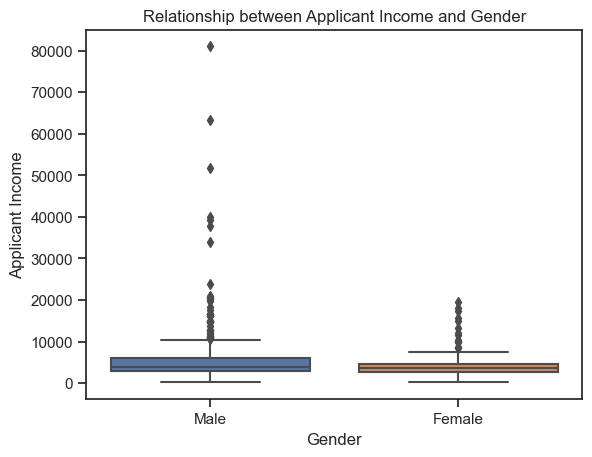

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt



# Set the style of the plot
sns.set(style="ticks")

# Create the box plot
sns.boxplot(x='Gender', y='ApplicantIncome', data=df)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Applicant Income')
plt.title('Relationship between Applicant Income and Gender')

# Display the plot
plt.show()


c:\Users\Tombra\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Tombra\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Tombra\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


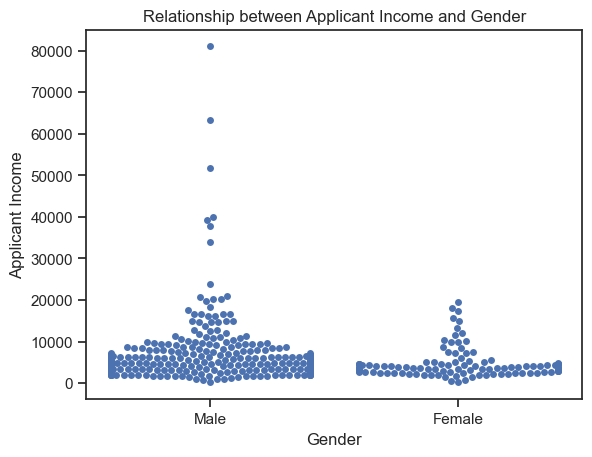

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="ticks")

# Create the swarm plot
sns.swarmplot(x='Gender', y='ApplicantIncome', data=df)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Applicant Income')
plt.title('Relationship between Applicant Income and Gender')

# Display the plot
plt.show()

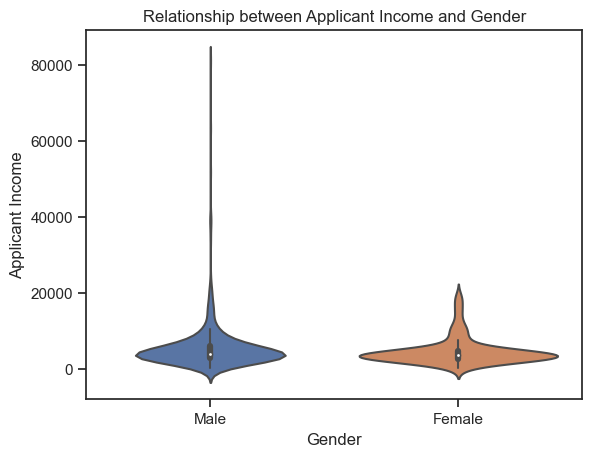

In [17]:
sns.violinplot(x='Gender', y='ApplicantIncome', data=df)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Applicant Income')
plt.title('Relationship between Applicant Income and Gender')

# Display the plot
plt.show()


In [18]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

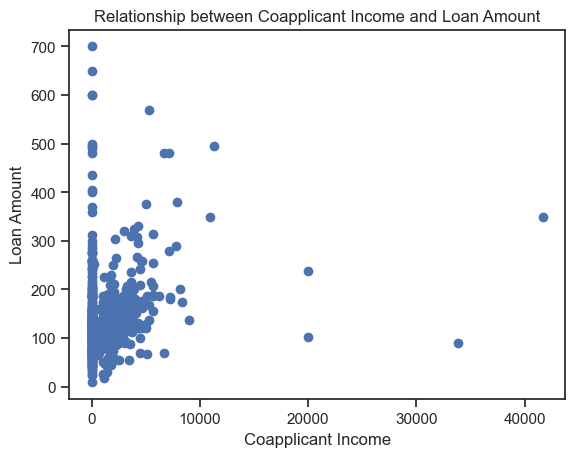

In [19]:
# Create a scatter plot
plt.scatter(df['CoapplicantIncome'], df['LoanAmount'])
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Amount')
plt.title('Relationship between Coapplicant Income and Loan Amount')
plt.show()

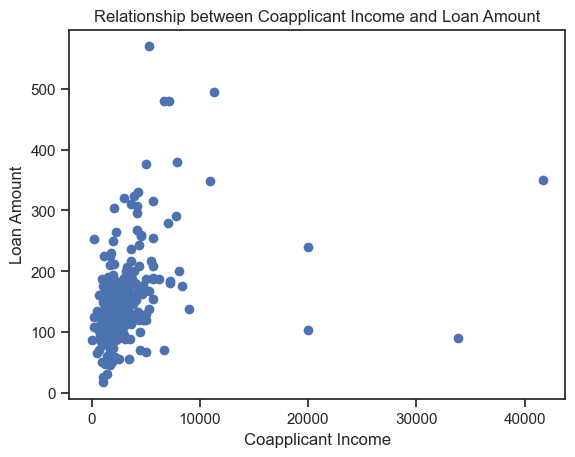

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove zero values
df_filtered = df[(df['CoapplicantIncome'] != 0) & (df['LoanAmount'] != 0)]

# Create a scatter plot
plt.scatter(df_filtered['CoapplicantIncome'], df_filtered['LoanAmount'])
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Amount')
plt.title('Relationship between Coapplicant Income and Loan Amount')

# Display the plot
plt.show()


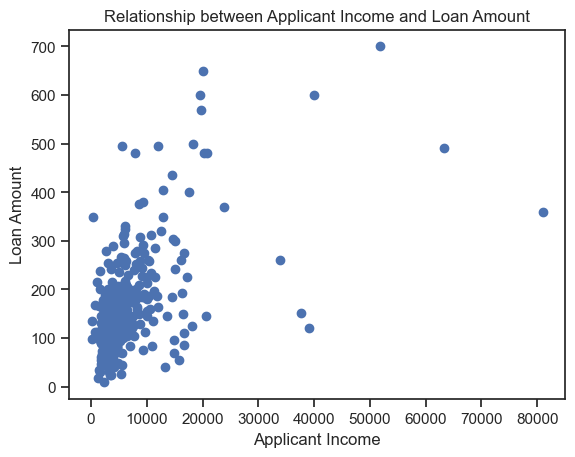

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove zero values
df_filtered = df[(df['ApplicantIncome'] != 0) & (df['LoanAmount'] != 0)]

# Create a scatter plot
plt.scatter(df_filtered['ApplicantIncome'], df_filtered['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Relationship between Applicant Income and Loan Amount')

# Display the plot
plt.show()

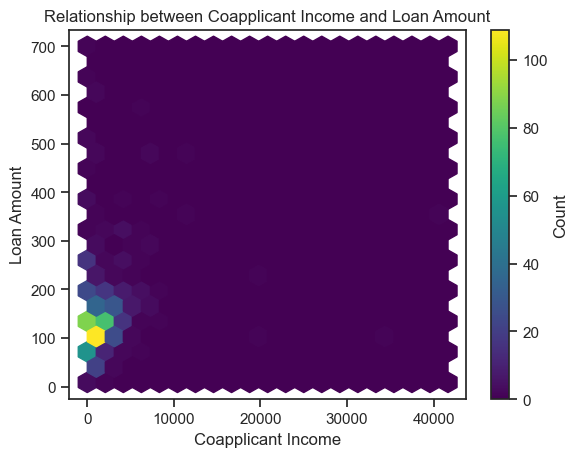

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove zero values
df_filtered = df[(df['ApplicantIncome'] != 0) & (df['LoanAmount'] != 0)]

# Create a hexbin plot
plt.hexbin(df_filtered['CoapplicantIncome'], df_filtered['LoanAmount'], gridsize=20, cmap='viridis')

# Set labels and title
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Amount')
plt.title('Relationship between Coapplicant Income and Loan Amount')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Count')

# Display the plot
plt.show()


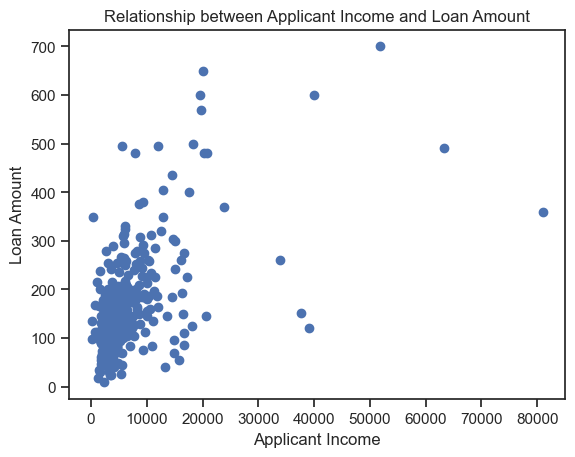

In [23]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Relationship between Applicant Income and Loan Amount')
plt.show()


In [24]:
#removing outliers from applicant income

import numpy as np
from scipy.stats import zscore


# Calculate the z-scores for each data point in the column
z_scores = np.abs(zscore(df['ApplicantIncome']))

# Define a threshold (e.g., z-score > 3 or < -3) to identify outliers
threshold = 3

# Identify the indices of the outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the DataFrame
df = df.drop(outlier_indices)

# Alternatively, you can create a new DataFrame without the outliers
df_no_outliers = df.loc[~df.index.isin(outlier_indices)]


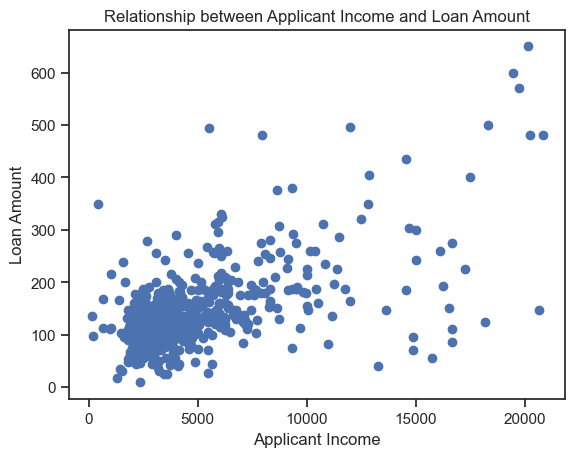

In [25]:
#After removing outliers from aaplicant income

# Create a scatter plot
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Relationship between Applicant Income and Loan Amount')
plt.show()

In [26]:
import numpy as np
from scipy.stats import zscore


# Calculate the z-scores for each data point in the column
z_scores = np.abs(zscore(df['CoapplicantIncome']))

# Define a threshold (e.g., z-score > 3 or < -3) to identify outliers
threshold = 3

# Identify the indices of the outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the DataFrame
df = df.drop(outlier_indices)

# Alternatively, you can create a new DataFrame without the outliers
df_no_outliers = df.loc[~df.index.isin(outlier_indices)]

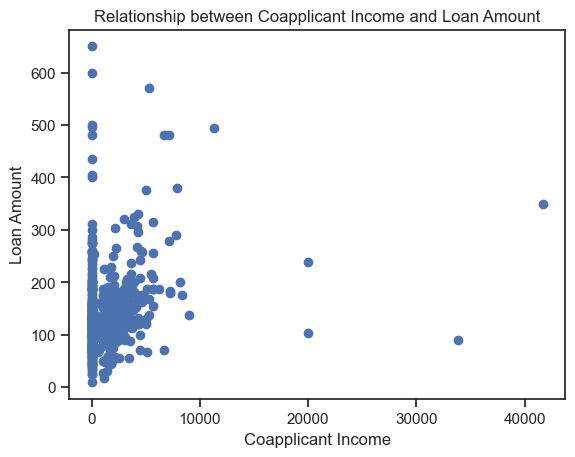

In [27]:
# Create a scatter plot
plt.scatter(df['CoapplicantIncome'], df['LoanAmount'])
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Amount')
plt.title('Relationship between Coapplicant Income and Loan Amount')
plt.show()

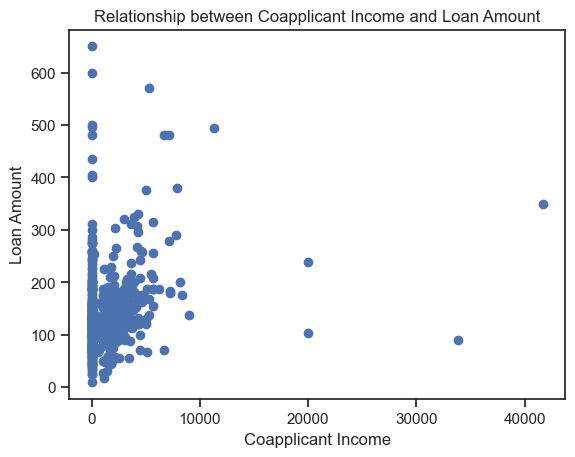

In [28]:
# Create a scatter plot
plt.scatter(df_no_outliers['CoapplicantIncome'], df_no_outliers['LoanAmount'])
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Amount')
plt.title('Relationship between Coapplicant Income and Loan Amount')
plt.show()

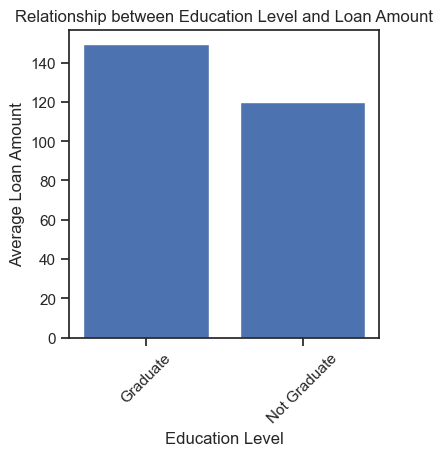

In [29]:
import matplotlib.pyplot as plt


# Group the data by education level and calculate the average loan amount
average_loan_amount = df.groupby('Education')['LoanAmount'].mean()

# Plot the bar plot
plt.figure(figsize=(4, 4))
plt.bar(average_loan_amount.index, average_loan_amount.values)
plt.xlabel('Education Level')
plt.ylabel('Average Loan Amount')
plt.title('Relationship between Education Level and Loan Amount')
plt.xticks(rotation=45)
plt.show()


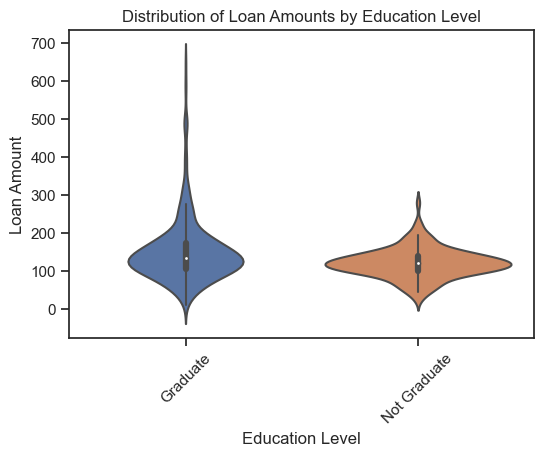

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
plt.figure(figsize=(6, 4))
sns.violinplot(x='Education', y='LoanAmount', data=df)
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amounts by Education Level')
plt.xticks(rotation=45)
plt.show()


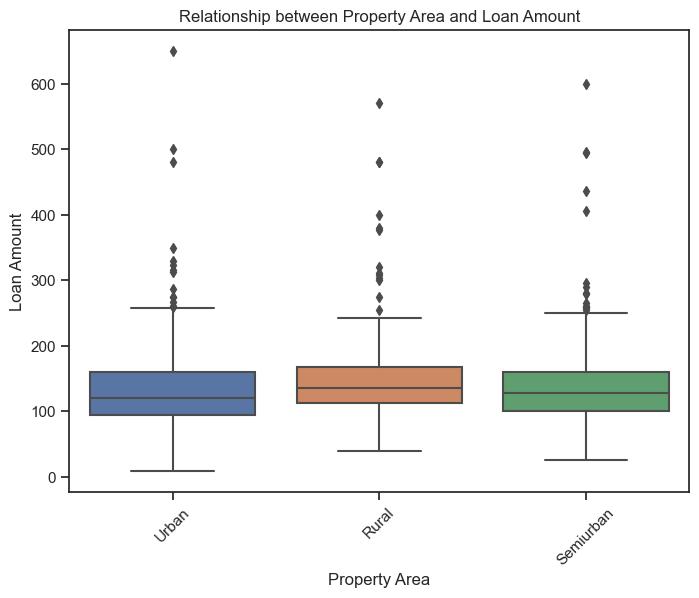

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Property_Area' is the column for property area
# and 'LoanAmount' is the column for loan amount

# Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Property_Area', y='LoanAmount', data=df)
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.title('Relationship between Property Area and Loan Amount')
plt.xticks(rotation=45)
plt.show()


c:\Users\Tombra\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


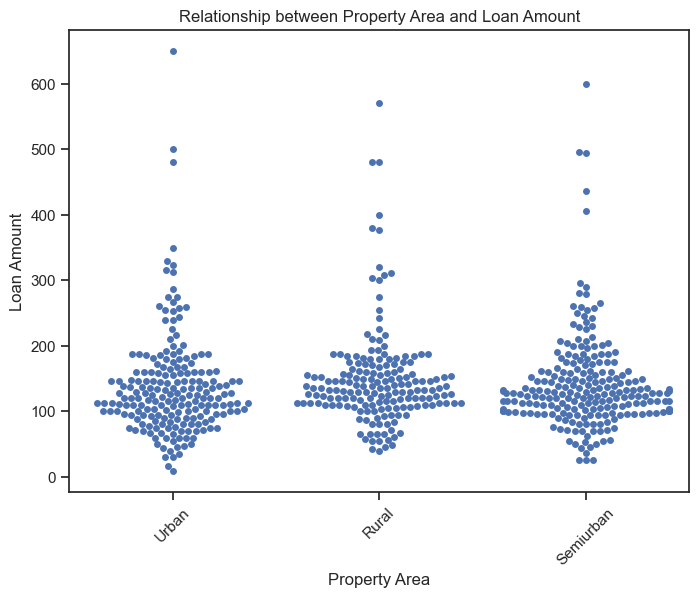

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Property_Area' is the column for property area
# and 'LoanAmount' is the column for loan amount

# Plot the swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Property_Area', y='LoanAmount', data=df)
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.title('Relationship between Property Area and Loan Amount')
plt.xticks(rotation=45)
plt.show()


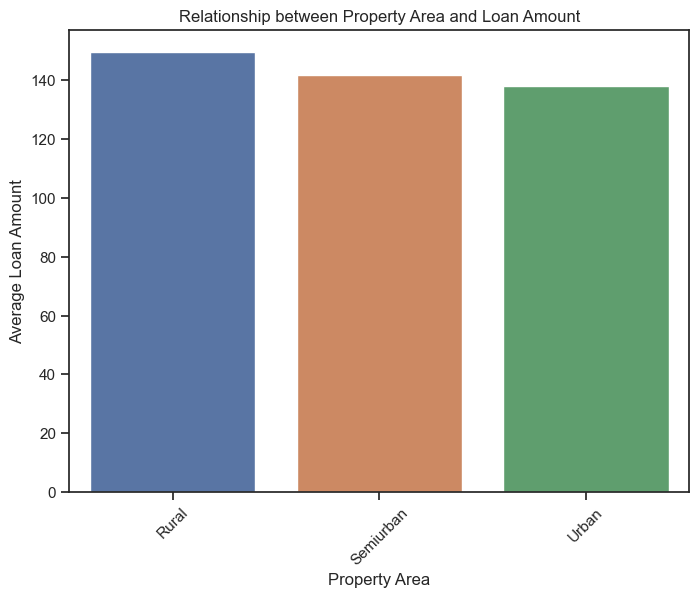

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Property_Area' is the column for property area
# and 'LoanAmount' is the column for loan amount

# Calculate the average loan amount for each property area
average_loan_amount = df.groupby('Property_Area')['LoanAmount'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Property_Area', y='LoanAmount', data=average_loan_amount)
plt.xlabel('Property Area')
plt.ylabel('Average Loan Amount')
plt.title('Relationship between Property Area and Loan Amount')
plt.xticks(rotation=45)
plt.show()


In [34]:
import numpy as np


# Calculate the IQR (Interquartile Range)
Q1 = np.percentile(df['ApplicantIncome'], 25)
Q3 = np.percentile(df['ApplicantIncome'], 75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]


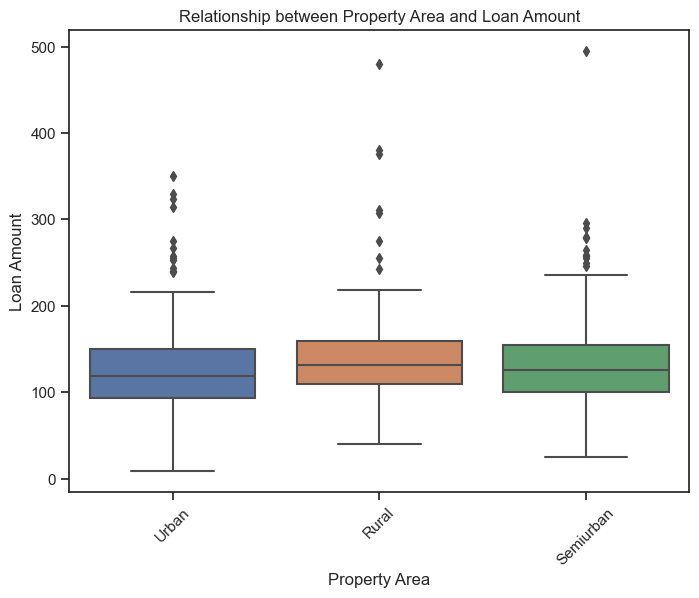

In [35]:
# after removing outliers from income

plt.figure(figsize=(8, 6))
sns.boxplot(x='Property_Area', y='LoanAmount', data=df)
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.title('Relationship between Property Area and Loan Amount')
plt.xticks(rotation=45)
plt.show()


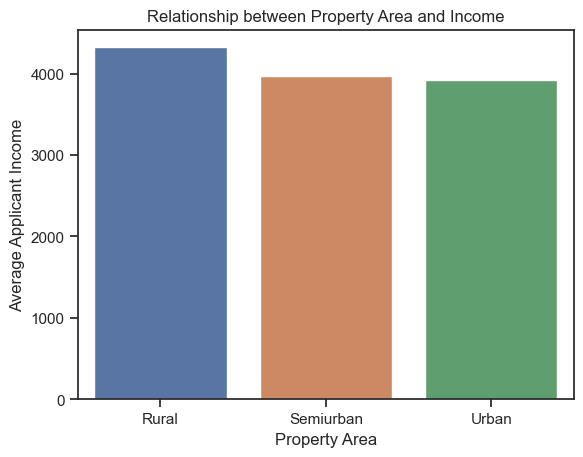

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the average income for each property area
average_income = df.groupby('Property_Area')['ApplicantIncome'].mean().reset_index()

# Create a bar plot
sns.barplot(x='Property_Area', y='ApplicantIncome', data=average_income)

# Set the plot title and labels
plt.title('Relationship between Property Area and Income')
plt.xlabel('Property Area')
plt.ylabel('Average Applicant Income')

# Show the plot
plt.show()


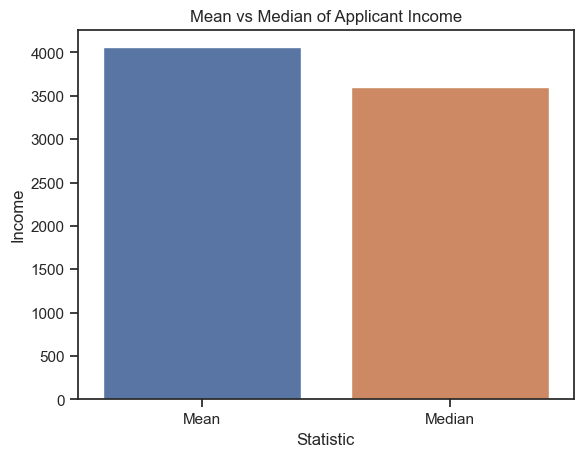

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean and median of applicant income
mean_income = df['ApplicantIncome'].mean()
median_income = df['ApplicantIncome'].median()

# Create a DataFrame to hold the mean and median values
income_stats = pd.DataFrame({'Statistic': ['Mean', 'Median'],
                             'Income': [mean_income, median_income]})

# Create a bar plot
sns.barplot(x='Statistic', y='Income', data=income_stats)

# Set the plot title and labels
plt.title('Mean vs Median of Applicant Income')
plt.xlabel('Statistic')
plt.ylabel('Income')

# Show the plot
plt.show()


In [38]:
unique_education = df['Education'].unique()
print(unique_education)


['Graduate' 'Not Graduate']


In [39]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [40]:
unique_married = df['Married'].unique()
print(unique_married)


['No' 'Yes']


In [41]:
unique_values_gender = df['Gender'].unique()
unique_values_married = df['Married'].unique()
unique_values_property_area = df['Property_Area'].unique()
unique_values_education = df['Education'].unique()
unique_values_loan_status = df['Loan_Status'].unique()

print("Unique values in Gender:", unique_values_gender)
print("Unique values in Married:", unique_values_married)
print("Unique values in Property Area:", unique_values_property_area)
print("Unique values in Education:", unique_values_education)
print("Unique values in Loan Status:", unique_values_loan_status)


Unique values in Gender: ['Male' 'Female']
Unique values in Married: ['No' 'Yes']
Unique values in Property Area: ['Urban' 'Rural' 'Semiurban']
Unique values in Education: ['Graduate' 'Not Graduate']
Unique values in Loan Status: ['Y' 'N']


In [42]:
unique_values = df[['Gender', 'Married', 'Property_Area', 'Education', 'Loan_Status']].nunique()
print(unique_values)


Gender           2
Married          2
Property_Area    3
Education        2
Loan_Status      2
dtype: int64


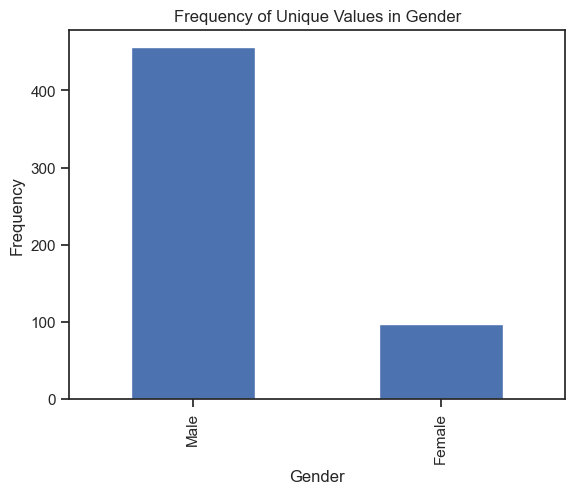

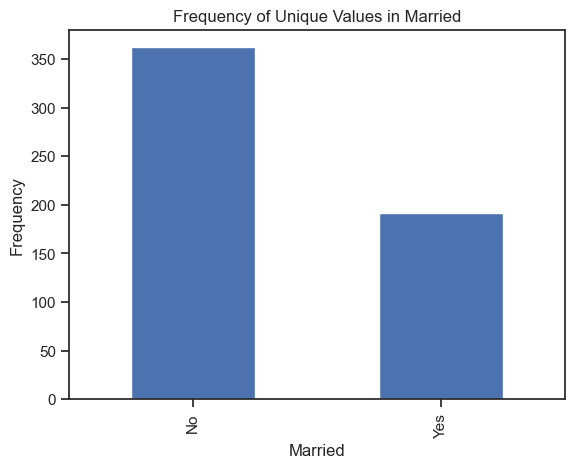

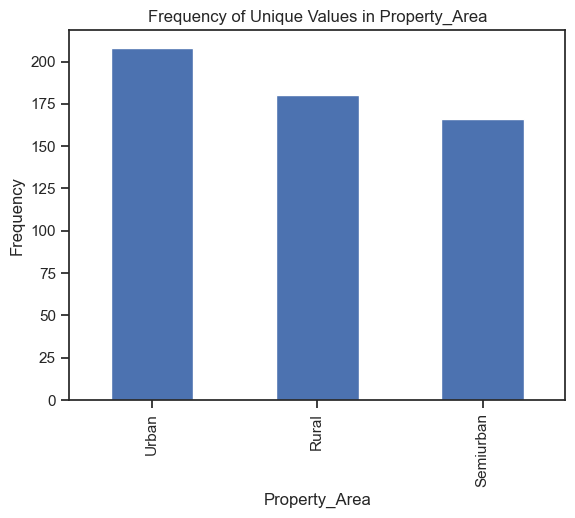

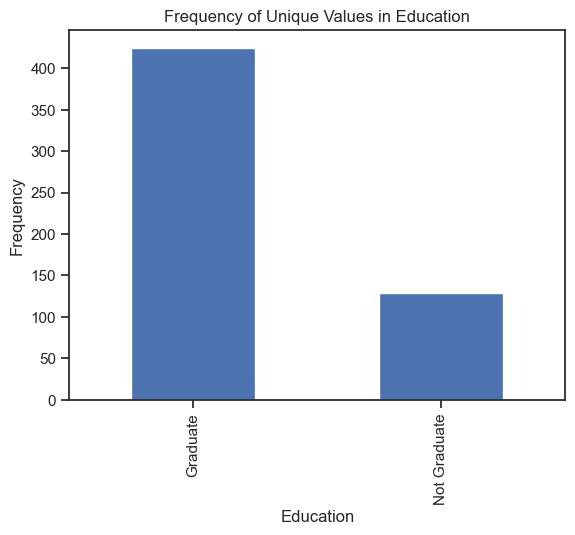

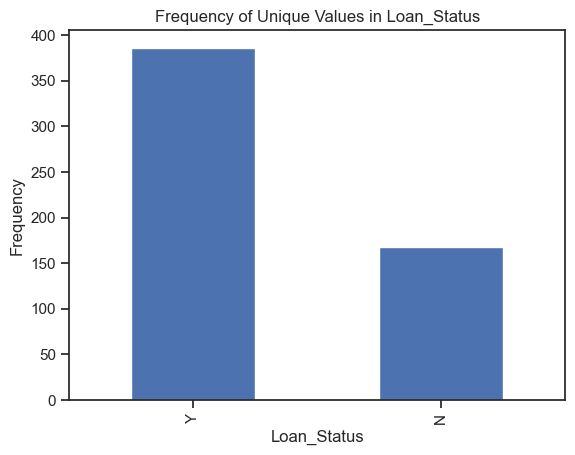

In [43]:
import matplotlib.pyplot as plt

def plot_frequency(column_name, unique_values):
    frequencies = df[column_name].value_counts()
    frequencies.plot(kind='bar')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Frequency of Unique Values in {}'.format(column_name))
    plt.xticks(range(len(unique_values)), unique_values)
    plt.show()

plot_frequency('Gender', unique_values_gender)
plot_frequency('Married', unique_values_married)
plot_frequency('Property_Area', unique_values_property_area)
plot_frequency('Education', unique_values_education)
plot_frequency('Loan_Status', unique_values_loan_status)


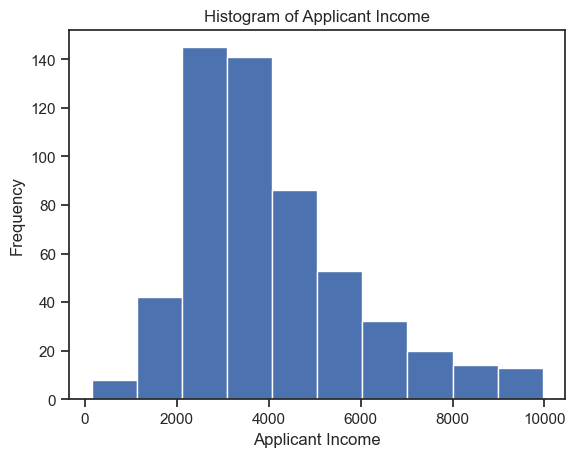

In [44]:
import matplotlib.pyplot as plt

plt.hist(df['ApplicantIncome'], bins=10)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')
plt.show()


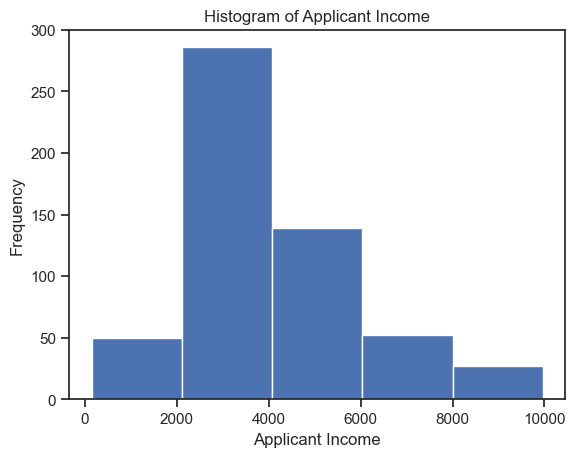

In [45]:
import matplotlib.pyplot as plt

plt.hist(df['ApplicantIncome'], bins=5)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')
plt.show()


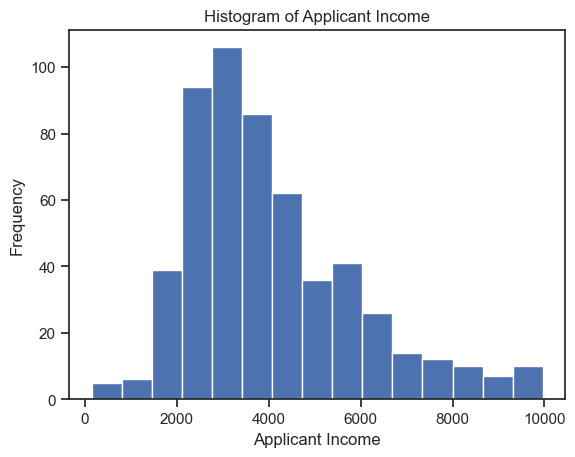

In [46]:
import matplotlib.pyplot as plt

plt.hist(df['ApplicantIncome'], bins=15)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')
plt.show()


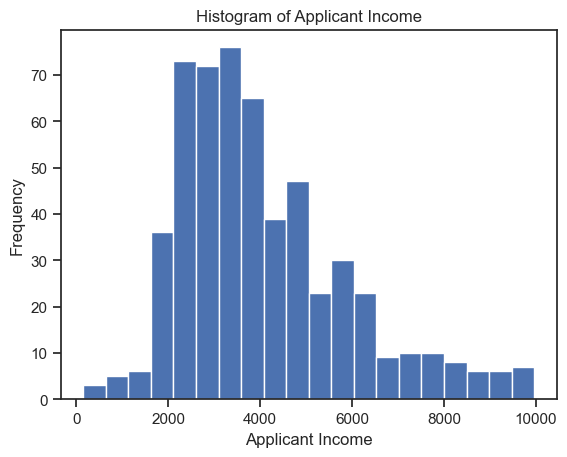

In [47]:
import matplotlib.pyplot as plt

plt.hist(df['ApplicantIncome'], bins=20)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')
plt.show()


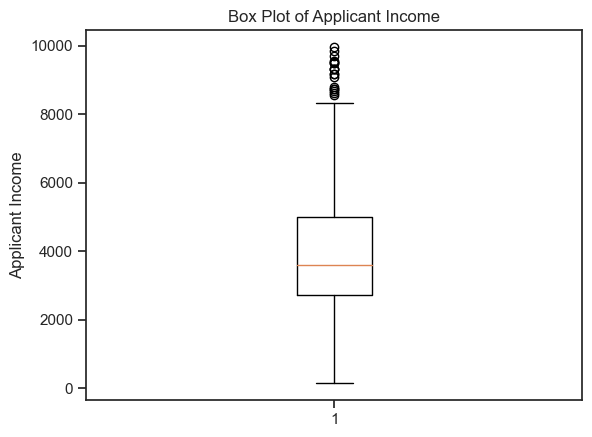

In [48]:
import matplotlib.pyplot as plt

plt.boxplot(df['ApplicantIncome'])
plt.ylabel('Applicant Income')
plt.title('Box Plot of Applicant Income')
plt.show()


In [49]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


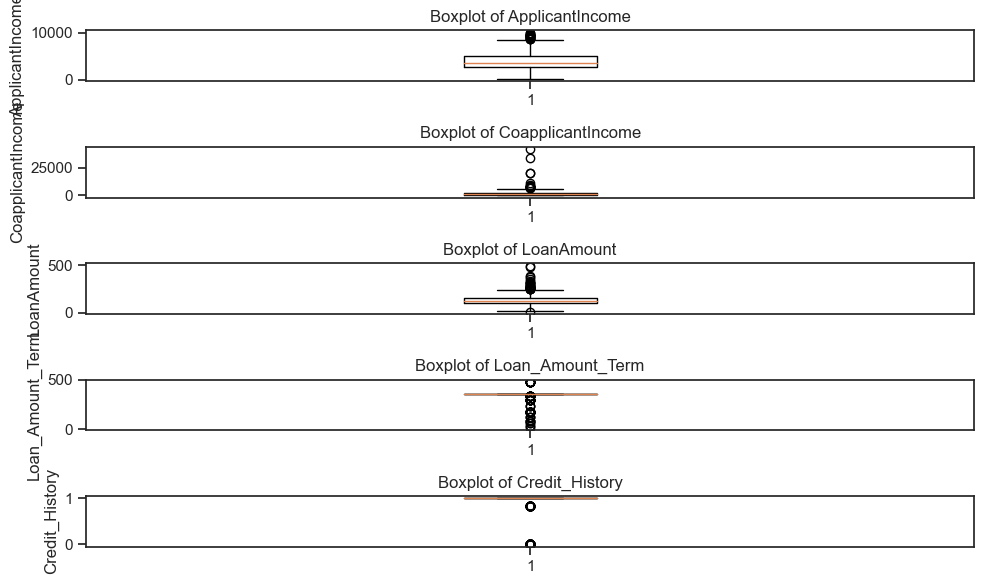

In [50]:
import matplotlib.pyplot as plt

columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

fig, axes = plt.subplots(nrows=len(columns), figsize=(10, 6))

for i, col in enumerate(columns):
    axes[i].boxplot(df[col])
    axes[i].set_ylabel(col)

    # Set title for each subplot
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


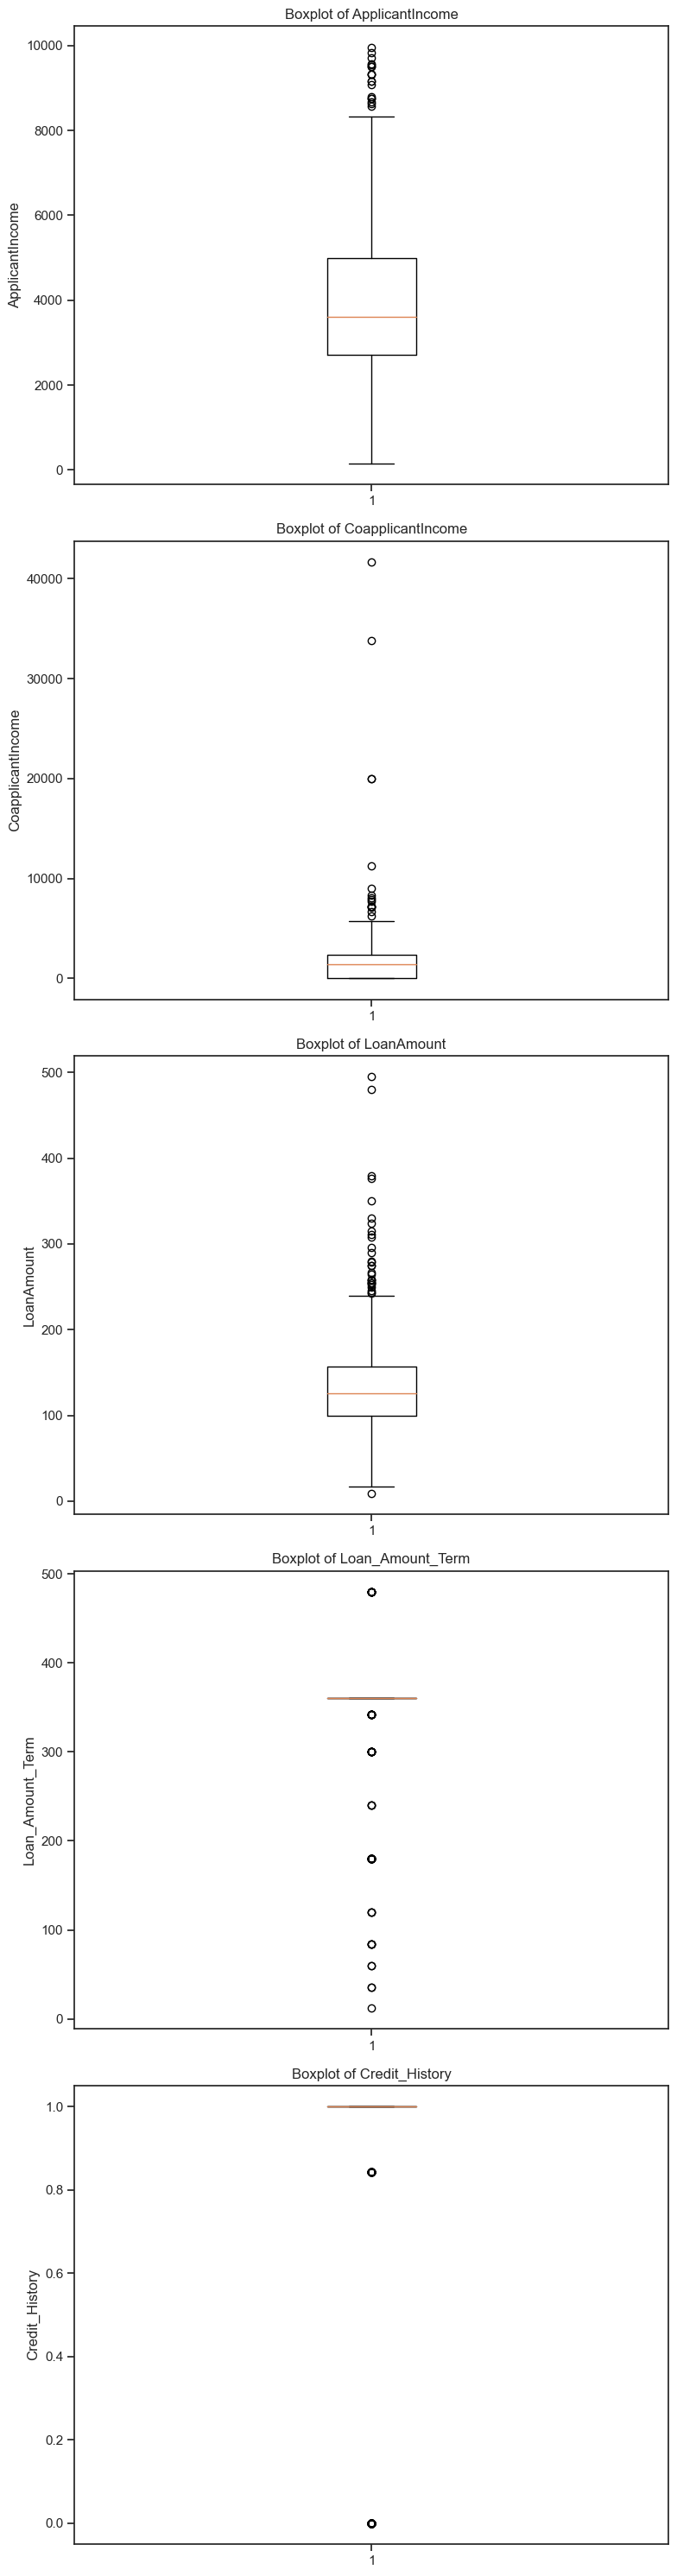

In [51]:
import matplotlib.pyplot as plt

columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

fig, axes = plt.subplots(nrows=len(columns), figsize=(8, 30))

for i, col in enumerate(columns):
    axes[i].boxplot(df[col])
    axes[i].set_ylabel(col)
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


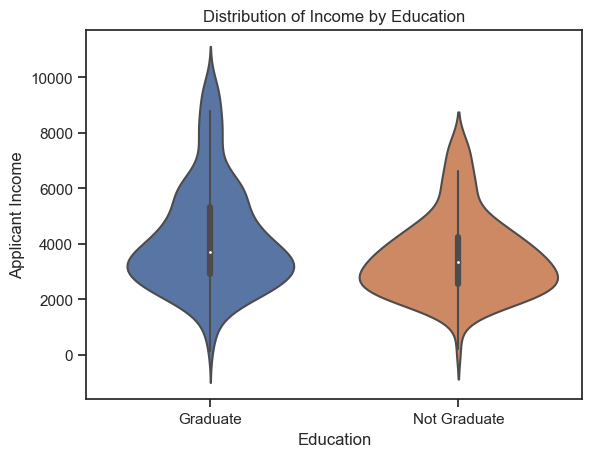

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='Education', y='ApplicantIncome', data=df)
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.title('Distribution of Income by Education')
plt.show()


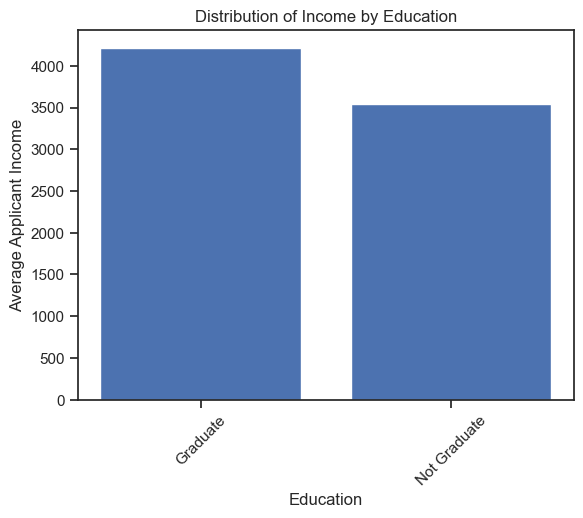

In [53]:
import matplotlib.pyplot as plt

income_by_education = df.groupby('Education')['ApplicantIncome'].mean().sort_values(ascending=False)

plt.bar(income_by_education.index, income_by_education.values)
plt.xlabel('Education')
plt.ylabel('Average Applicant Income')
plt.title('Distribution of Income by Education')
plt.xticks(rotation=45)
plt.show()


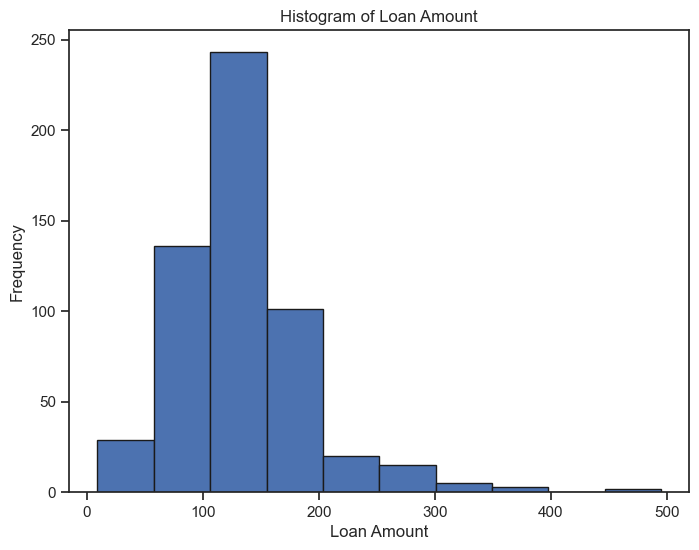

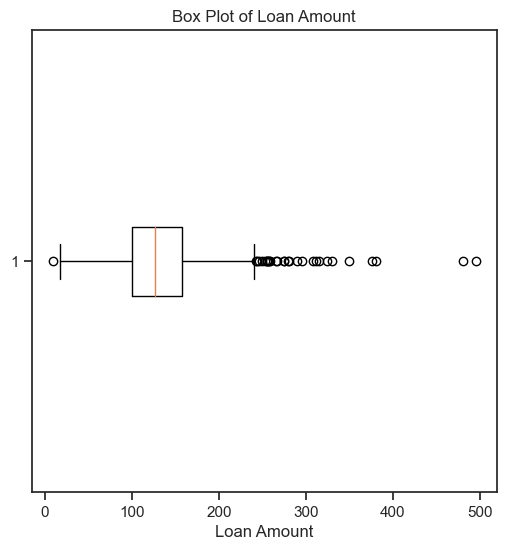

In [54]:
import matplotlib.pyplot as plt

loan_amount = df['LoanAmount']

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(loan_amount, bins=10, edgecolor='k')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount')
plt.show()

# Box plot
plt.figure(figsize=(6, 6))
plt.boxplot(loan_amount, vert=False)
plt.xlabel('Loan Amount')
plt.title('Box Plot of Loan Amount')
plt.show()


In [55]:
import pandas as pd

# Create a pivot table
pivot_table = df.pivot_table(index='Loan_Status', columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], aggfunc='size', fill_value=0)

# Print the pivot table
print(pivot_table)


Gender          Female                                                     \
Married             No                                                      
Education     Graduate                                       Not Graduate   
Self_Employed       No                   Yes                           No   
Property_Area    Rural Semiurban Urban Rural Semiurban Urban        Rural   
Loan_Status                                                                 
N                    3         8     7     1         2     0            2   
Y                   10        14    11     0         2     2            2   

Gender                                  ...     Male                        \
Married                            Yes  ...      Yes                         
Education                     Graduate  ... Graduate                         
Self_Employed                       No  ...       No   Yes                   
Property_Area Semiurban Urban    Rural  ...    Urban Rural Semiurban Ur

C:\Users\Tombra\AppData\Local\Temp\ipykernel_15260\1133966186.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['Loan_Status'] = pd.Categorical(categorical_df['Loan_Status'])


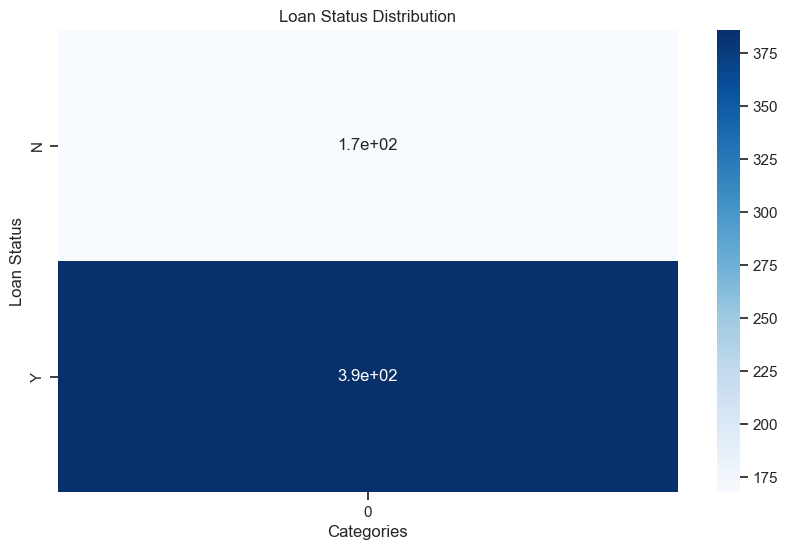

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the categorical columns
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Create a subset of the DataFrame with only the categorical columns
categorical_df = df[categorical_columns]

# Convert Loan_Status column to categorical type if needed
categorical_df['Loan_Status'] = pd.Categorical(categorical_df['Loan_Status'])

# Create a pivot table
pivot_table = categorical_df.pivot_table(index='Loan_Status', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table.to_frame(), annot=True, cmap='Blues')
plt.title('Loan Status Distribution')
plt.xlabel('Categories')
plt.ylabel('Loan Status')
plt.show()


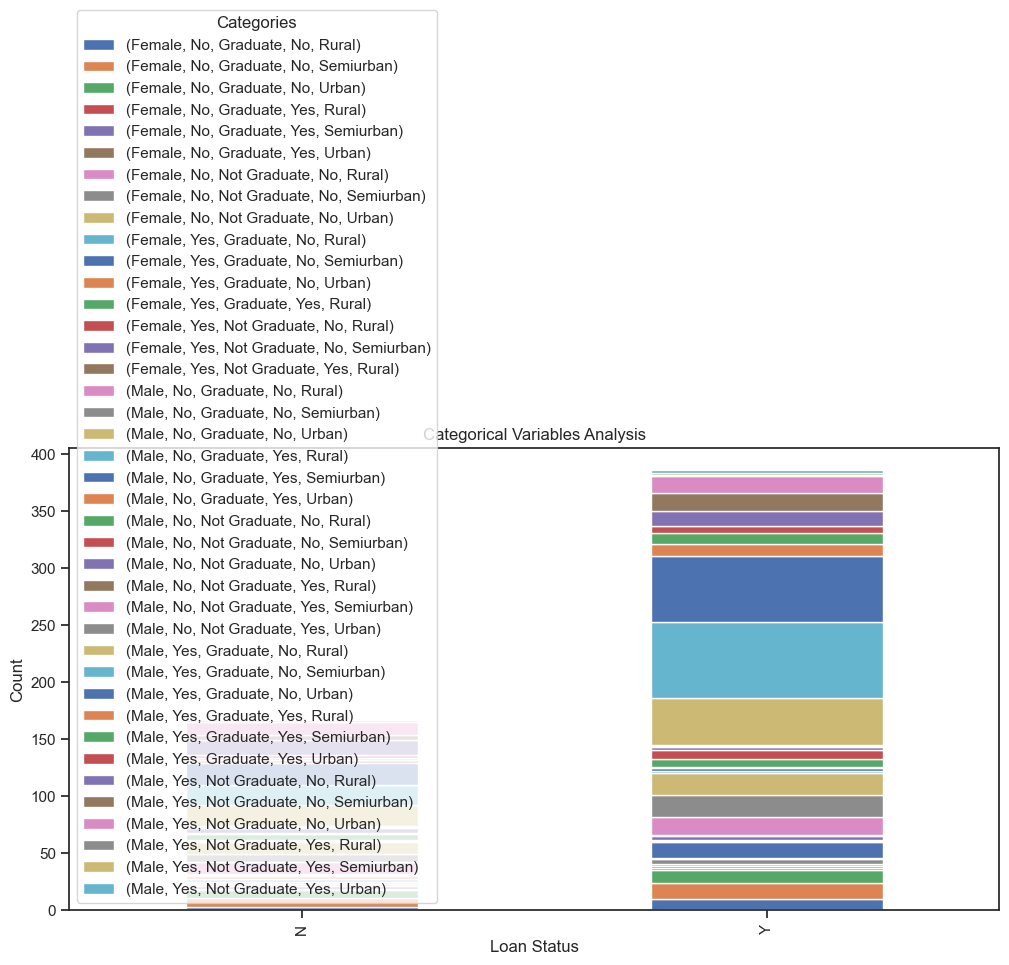

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pivot table
pivot_table = df.pivot_table(index='Loan_Status', columns=['Gender', 'Married',  'Education', 'Self_Employed', 'Property_Area'], aggfunc='size', fill_value=0)

# Plot a bar plot for each category
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Categorical Variables Analysis")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.legend(title="Categories")
plt.show()


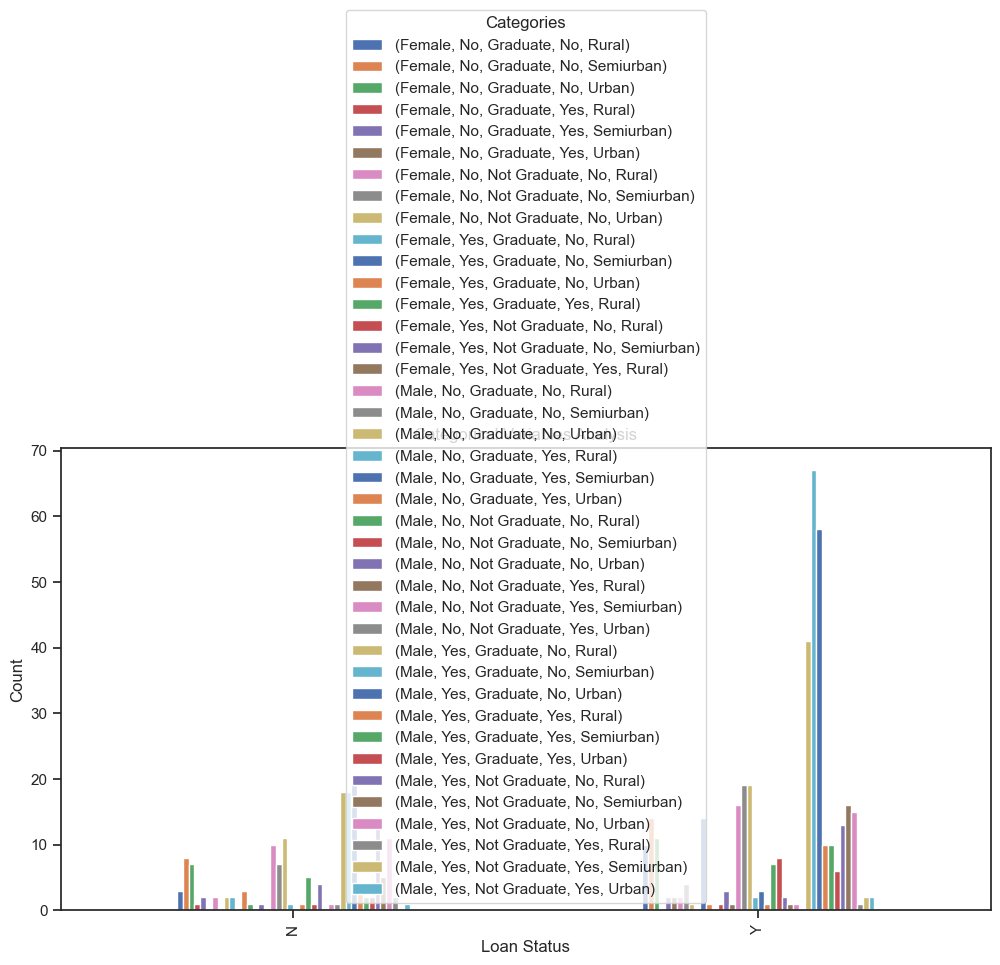

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pivot table
pivot_table = df.pivot_table(index='Loan_Status', columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], aggfunc='size', fill_value=0)

# Plot a grouped bar plot
pivot_table.plot(kind='bar', figsize=(12, 6))
plt.title("Categorical Variables Analysis")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.legend(title="Categories")
plt.show()


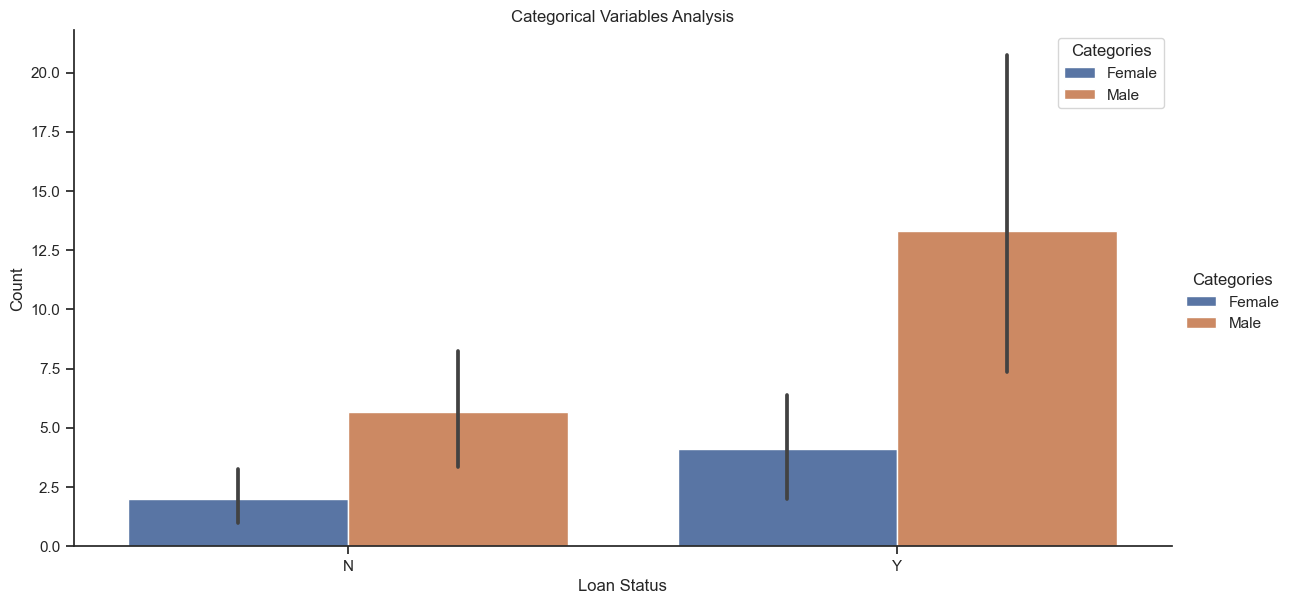

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table
pivot_table = df.pivot_table(index='Loan_Status', columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], aggfunc='size', fill_value=0)

# Convert the pivot table to a DataFrame
pivot_df = pivot_table.reset_index()

# Melt the DataFrame to long format
melted_df = pivot_df.melt(id_vars='Loan_Status', var_name='Categories', value_name='Count')

# Plot the categorical plot
sns.catplot(data=melted_df, x='Loan_Status', y='Count', hue='Categories', kind='bar', height=6, aspect=2)
plt.title("Categorical Variables Analysis")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.legend(title="Categories")
plt.show()


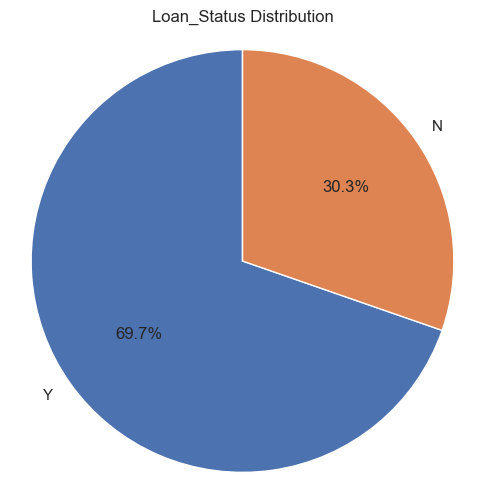

In [60]:
import matplotlib.pyplot as plt

# Select the categorical column
categorical_column = 'Loan_Status'

# Calculate value counts
value_counts = df[categorical_column].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title(categorical_column + ' Distribution')
plt.axis('equal')
plt.show()


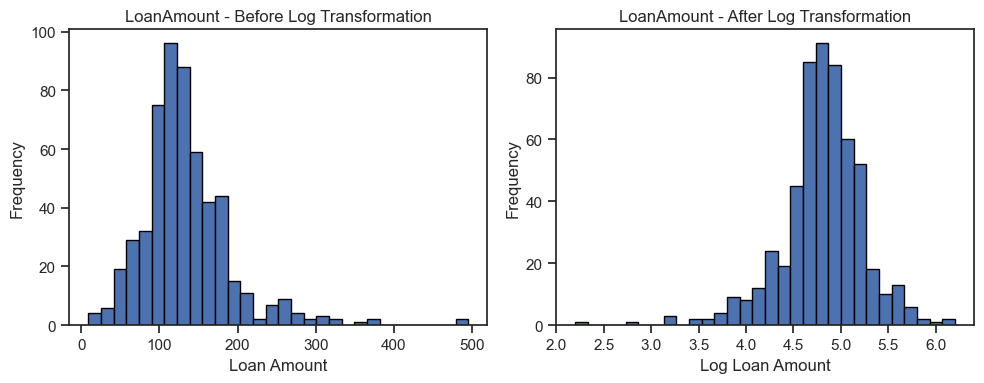

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Plot histogram before log transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['LoanAmount'].dropna(), bins=30, edgecolor='black')
plt.title('LoanAmount - Before Log Transformation')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Apply log transformation to LoanAmount
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Plot histogram after log transformation
plt.subplot(1, 2, 2)
plt.hist(df['LoanAmount_log'].dropna(), bins=30, edgecolor='black')
plt.title('LoanAmount - After Log Transformation')
plt.xlabel('Log Loan Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [62]:
import pandas as pd

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'LoanAmount' column
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

In [63]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760


In [64]:
# Create a new column 'total_income' by summing 'ApplicantIncome' and 'CoapplicantIncome'
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']


In [65]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0


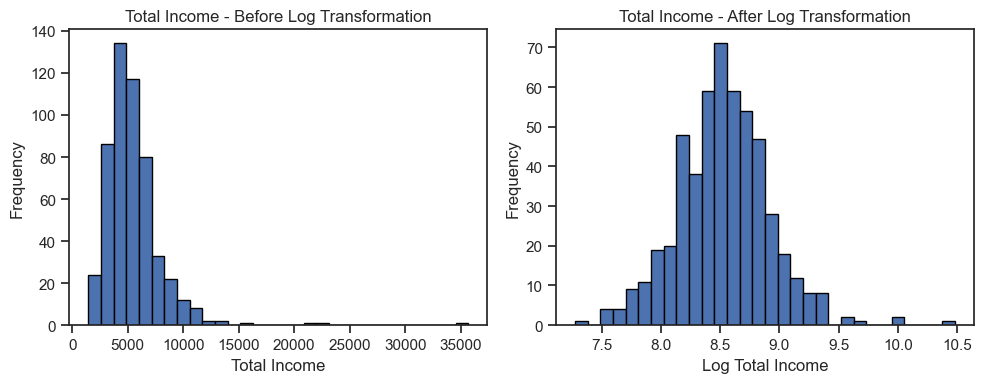

In [66]:
import numpy as np
import matplotlib.pyplot as plt


# Plot histogram before log transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['Total_income'].dropna(), bins=30, edgecolor='black')
plt.title('Total Income - Before Log Transformation')
plt.xlabel('Total Income')
plt.ylabel('Frequency')

# Apply log transformation to total_income
df['Total_income_log'] = np.log(df['Total_income'])

# Plot histogram after log transformation
plt.subplot(1, 2, 2)
plt.hist(df['Total_income_log'].dropna(), bins=30, edgecolor='black')
plt.title('Total Income - After Log Transformation')
plt.xlabel('Log Total Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\Tombra\AppData\Local\Temp\ipykernel_15260\45549805.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


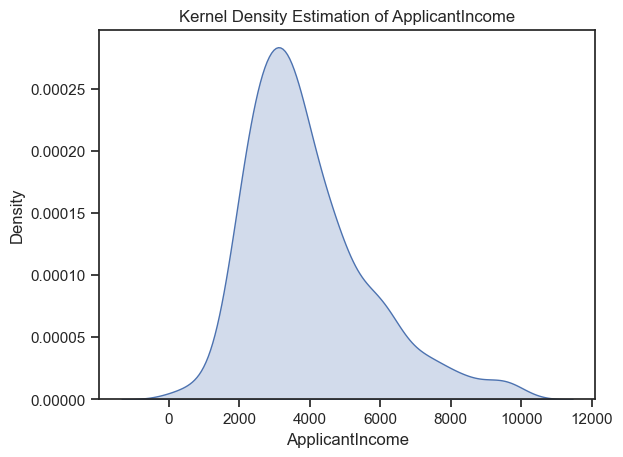

C:\Users\Tombra\AppData\Local\Temp\ipykernel_15260\45549805.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


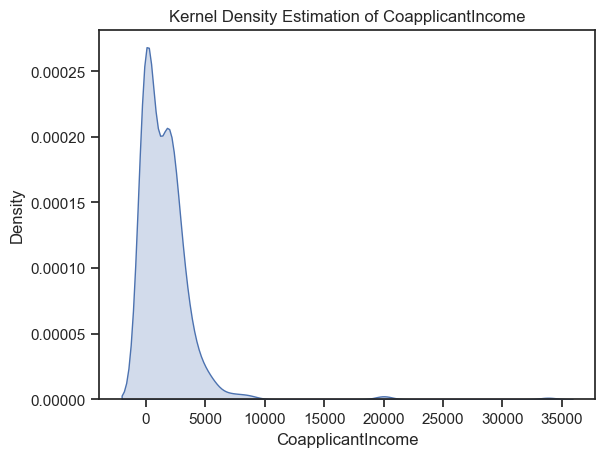

In [67]:
import seaborn as sns

columns = ['ApplicantIncome', 'CoapplicantIncome']

# Plot KDE plots for each column
for column in columns:
    sns.kdeplot(df[column], shade=True)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimation of {column}')
    plt.show()


In [68]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_income,Total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y,4.682131,5182.0,8.552946
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd


# Load dataset and define the target variable
df = df
X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']

# Separate numerical and categorical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Convert numerical columns to numeric data type
X[numerical_columns] = X[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Perform scaling on numerical variables and one-hot encoding on categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_columns),
        ('categorical', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Fit and transform the data
X_encoded_scaled = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, test_size=0.2, random_state=27, stratify=y)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')


Test set accuracy: 0.6910569105691057


In [ ]:
#Improve model using grid search

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize grid search with logistic regression model
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Train the model using grid search
grid_search.fit(X_train_pca, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_pca)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')
print("Best parameters found by grid search:")
print(grid_search.best_params_)


Test set accuracy: 0.7047619047619048
Best parameters found by grid search:
{'C': 0.1, 'solver': 'liblinear'}


In [ ]:
#building a predictive model

import pandas as pd

# Select categorical columns for one-hot encoding
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)




df_encoded

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Total_income,Total_income_log,...,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,0,5849,0.0,146.412162,360.0,1.0,4.986426,5849.0,8.674026,...,0,1,0,1,0,0,0,1,0,1
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,4.852030,6091.0,8.714568,...,1,1,0,1,0,1,0,0,1,0
2,LP001005,0,3000,0.0,66.000000,360.0,1.0,4.189655,3000.0,8.006368,...,1,1,0,0,1,0,0,1,0,1
3,LP001006,0,2583,2358.0,120.000000,360.0,1.0,4.787492,4941.0,8.505323,...,1,0,1,1,0,0,0,1,0,1
4,LP001008,0,6000,0.0,141.000000,360.0,1.0,4.948760,6000.0,8.699515,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,0,3232,1950.0,108.000000,360.0,1.0,4.682131,5182.0,8.552946,...,1,1,0,1,0,1,0,0,0,1
609,LP002978,0,2900,0.0,71.000000,360.0,1.0,4.262680,2900.0,7.972466,...,0,1,0,1,0,1,0,0,0,1
610,LP002979,3+,4106,0.0,40.000000,180.0,1.0,3.688879,4106.0,8.320205,...,1,1,0,1,0,1,0,0,0,1
612,LP002984,2,7583,0.0,187.000000,360.0,1.0,5.231109,7583.0,8.933664,...,1,1,0,1,0,0,0,1,0,1


In [ ]:
df_combined

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Total_income,Total_income_log,Gender_Female,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,PC1,PC2,PC3
0,0,1.100751,-0.643853,0.536077,0.283362,0.457225,0.587024,0.139665,0.375110,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.875937,-1.189239,0.422775
1,1,0.371827,-0.014838,0.081516,0.283362,0.457225,0.234335,0.231456,0.479189,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.591045,-0.155060,0.145037
2,0,-0.539616,-0.643853,-1.449144,0.283362,0.457225,-1.503916,-0.940958,-1.338914,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-2.699839,0.297638,0.232627
3,0,-0.779711,0.339713,-0.115988,0.283362,0.457225,0.064968,-0.204738,-0.057987,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.278830,0.455800,-0.516643
4,0,1.187692,-0.643853,0.402461,0.283362,0.457225,0.488179,0.196940,0.440545,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.862567,-1.116610,0.531755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.944162,-1.702485,1.223217
509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.358763,-1.329077,0.250689
511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.582035,-1.916606,1.588432
514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.449531,-0.904179,0.551397


In [ ]:
df_encoded.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Total_income,Total_income_log,...,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,0,5849,0.0,146.412162,360.0,1.0,4.986426,5849.0,8.674026,...,0,1,0,1,0,0,0,1,0,1
1,LP001003,1,4583,1508.0,128.000000,360.0,1.0,4.852030,6091.0,8.714568,...,1,1,0,1,0,1,0,0,1,0
2,LP001005,0,3000,0.0,66.000000,360.0,1.0,4.189655,3000.0,8.006368,...,1,1,0,0,1,0,0,1,0,1
3,LP001006,0,2583,2358.0,120.000000,360.0,1.0,4.787492,4941.0,8.505323,...,1,0,1,1,0,0,0,1,0,1
4,LP001008,0,6000,0.0,141.000000,360.0,1.0,4.948760,6000.0,8.699515,...,0,1,0,1,0,0,0,1,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Total_income', 'LoanAmount_log','Total_income_log']

# Perform standardization
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# View the scaled DataFrame
print(df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         1.100751          -0.643853    0.536077          0.283362   
1         0.371827          -0.014838    0.081516          0.283362   
2        -0.539616          -0.643853   -1.449144          0.283362   
3        -0.779711           0.339713   -0.115988          0.283362   
4         1.187692          -0.643853    0.402461          0.283362   

   Credit_History Property_Area Loan_Status  LoanAmount_log  Total_income  \
0        0.457225         Urban           Y        0.587024      0.139665   
1   

In [ ]:
#Dimension reduction PCA
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=3)  # Specify the number of components to keep
pca_result = pca.fit_transform(df[numerical_columns])

# Create a new DataFrame with the PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2','PC3'])

# Concatenate the PCA results with the original DataFrame
df_combined = pd.concat([df_encoded, df_pca], axis=1)

# View the combined DataFrame with PCA results
df_combined.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Total_income,Total_income_log,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,PC1,PC2,PC3
0,LP001002,0,5849.0,0.0,146.412162,360.0,1.0,4.986426,5849.0,8.674026,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.875937,-1.189239,0.422775
1,LP001003,1,4583.0,1508.0,128.000000,360.0,1.0,4.852030,6091.0,8.714568,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.591045,-0.155060,0.145037
2,LP001005,0,3000.0,0.0,66.000000,360.0,1.0,4.189655,3000.0,8.006368,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-2.699839,0.297638,0.232627
3,LP001006,0,2583.0,2358.0,120.000000,360.0,1.0,4.787492,4941.0,8.505323,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.278830,0.455800,-0.516643
4,LP001008,0,6000.0,0.0,141.000000,360.0,1.0,4.948760,6000.0,8.699515,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.862567,-1.116610,0.531755


In [ ]:
df_combined

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Total_income,Total_income_log,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,PC1,PC2,PC3
0,LP001002,0,5849.0,0.0,146.412162,360.0,1.0,4.986426,5849.0,8.674026,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.875937,-1.189239,0.422775
1,LP001003,1,4583.0,1508.0,128.000000,360.0,1.0,4.852030,6091.0,8.714568,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.591045,-0.155060,0.145037
2,LP001005,0,3000.0,0.0,66.000000,360.0,1.0,4.189655,3000.0,8.006368,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-2.699839,0.297638,0.232627
3,LP001006,0,2583.0,2358.0,120.000000,360.0,1.0,4.787492,4941.0,8.505323,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.278830,0.455800,-0.516643
4,LP001008,0,6000.0,0.0,141.000000,360.0,1.0,4.948760,6000.0,8.699515,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.862567,-1.116610,0.531755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.944162,-1.702485,1.223217
509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.358763,-1.329077,0.250689
511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.582035,-1.916606,1.588432
514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.449531,-0.904179,0.551397


In [ ]:
combined_df_cleaned = df_combined.dropna(subset=df_pca.columns.tolist() + df_encoded.columns.tolist())


In [ ]:
combined_df_cleaned = combined_df_cleaned.drop('Loan_ID', axis=1)


In [ ]:
df_all= combined_df_cleaned

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd
import pickle

# Load your dataset and define the target variable
df = pd.read_csv(r'C:\Users\Tombra\deployment\deployment\data.csv')
X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']

# Separate numerical and categorical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Convert numerical columns to numeric data type
X[numerical_columns] = X[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Define the preprocessing steps for numerical and categorical data
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())  # Use MinMaxScaler to ensure non-negative values
])
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_preprocessor, numerical_columns),
        ('categorical', categorical_preprocessor, categorical_columns)
    ])

# Create the feature selector
feature_selector = SelectKBest(score_func=chi2)  # Select features based on chi-square test

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('pca', PCA(n_components=3)),
    ('model', LogisticRegression())
])

# Fit the pipeline on the entire dataset
pipeline.fit(X, y)

# Take a sample row from the dataset
sample_row = X.sample(n=1, random_state=42)

# Predict the probability of being granted a loan for the sample row
probability = pipeline.predict_proba(sample_row)[0][1]

print("Probability of being granted a loan:", probability)




Probability of being granted a loan: 0.790056339286499


In [ ]:
# Assume you have a dataframe called `applicants` containing applicant information

# Preprocess the applicant data using the same preprocessing steps as in the model
preprocessed_applicants = pipeline.named_steps['preprocessor'].transform(df)

# Select the relevant features for prediction
selected_features = pipeline.named_steps['feature_selector'].transform(preprocessed_applicants)

# Apply dimensionality reduction (PCA) if applicable
if 'pca' in pipeline.named_steps:
    selected_features = pipeline.named_steps['pca'].transform(selected_features)

# Make predictions using the model
probabilities = pipeline.named_steps['model'].predict_proba(selected_features)

# Create a new column in the applicants dataframe to store the probabilities
df['Loan_Probability'] = probabilities[:, 1]

# Sort the applicants by loan probability in descending order
applicants_sorted = df.sort_values('Loan_Probability', ascending=False)

# Print the top applicants with the highest loan probability
top_applicants = applicants_sorted.head(10)
print(top_applicants[['Gender', 'Loan_Probability']])


    Gender  Loan_Probability
155   Male          0.794142
557   Male          0.793929
185   Male          0.793694
25    Male          0.793236
327   Male          0.793113
74    Male          0.793111
177   Male          0.792937
591   Male          0.792848
488   Male          0.792834
460    NaN          0.792816
